In [13]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.17.0-dev20240601
3.4.1.dev2024071703


In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

### เพิ่มมา 1 layer 128 & 256 nodes

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # keras.layers.Dense(128, keras.activations.relu),
    keras.layers.Dense(256, keras.activations.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# model.fit(train_images, train_labels, batch_size=128, 
#           validation_data=(test_images, test_labels), epochs=15)
model.fit(train_images, train_labels, batch_size=256, 
          validation_data=(test_images, test_labels), epochs=15)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7367 - loss: 0.7760 - val_accuracy: 0.8364 - val_loss: 0.4628
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8557 - loss: 0.4134 - val_accuracy: 0.8541 - val_loss: 0.4136
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8695 - loss: 0.3676 - val_accuracy: 0.8621 - val_loss: 0.3870
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8774 - loss: 0.3409 - val_accuracy: 0.8703 - val_loss: 0.3741
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8877 - loss: 0.3186 - val_accuracy: 0.8673 - val_loss: 0.3774
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8885 - loss: 0.3059 - val_accuracy: 0.8708 - val_loss: 0.3587
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8965 - loss: 0.2864 - val_accuracy: 0.8786 - val_loss: 0.3389
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8968 - loss: 0.2815 - val_accuracy: 0.

In [11]:
predict = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 0, 'Sneaker')

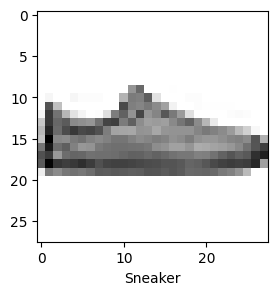

In [7]:
index = 12
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print()
plt.figure(figsize=(3,3))
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.xlabel(class_names[np.argmax(predict[index])])

### Accuracy Summary
A : accuracy: 0.8694 - loss: 0.3782 - val_accuracy: 0.8465 - val_loss: 0.4390 <br>
B0(128): accuracy: 0.9112 - loss: 0.2437 - val_accuracy: 0.8807 - val_loss: 0.3464 <br>
B1(256): accuracy: 0.9197 - loss: 0.2193 - val_accuracy: 0.8817 - val_loss: 0.3393 ***ไม่ regularise -> overfitting***

เมื่อเราทำการเพิ่ม layer มาอีก 1 ปรากฏว่าโมเดลของเราให้ผล acc traning มากกว่า val_acc <br> 
สามารถตีความได้ว่าโมเดลของเรานั้นจำข้อมูลที่นำมาฝึกได้เก่งมาก แต่ไม่เก่งในการที่เอาไปทำนายเอาซะเลย